In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load 2 data sets
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

cre_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record.csv')

In [3]:
# Check the size of each data set
print(app_rec.shape)
print(cre_rec.shape)

(438557, 18)
(1048575, 3)


# A - app_rec Data Cleaning

In [4]:
app_rec.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [5]:
app_rec.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [6]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Notes:
1) ID is int64 and should be changed to object format.
2) FLAG_Mobile, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL should be changed to Object format.
3) We have missing values for OCCUPATION_TYPE.

In [7]:
# Create code for object data type fields:
   # 'NAME_INCOME_TYPE', 
   # 'NAME_EDUCATION_TYPE', 
   # 'NAME_FAMILY_STATUS', 
   # 'NAME_HOUSING_TYPE'


print(app_rec.NAME_INCOME_TYPE.unique())
print(app_rec.NAME_EDUCATION_TYPE.unique())
print(app_rec.NAME_FAMILY_STATUS.unique())
print(app_rec.NAME_HOUSING_TYPE.unique())

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [8]:
# Use OneHot_encoding to create binary values for 4 different fiels (see the above cell):
app_rec = pd.get_dummies(data=app_rec, columns=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])#.astype(str)

In [9]:
# Change the data type of the 'ID','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL' to string data type.
columns = ['ID','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
for column in columns:
    app_rec[column] = app_rec[column].astype(str)

In [10]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 35 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  object 
 1   CODE_GENDER                                        438557 non-null  object 
 2   FLAG_OWN_CAR                                       438557 non-null  object 
 3   FLAG_OWN_REALTY                                    438557 non-null  object 
 4   CNT_CHILDREN                                       438557 non-null  int64  
 5   AMT_INCOME_TOTAL                                   438557 non-null  float64
 6   DAYS_BIRTH                                         438557 non-null  int64  
 7   DAYS_EMPLOYED                                      438557 non-null  int64  
 8   FLAG_MOBIL                                         438557 non-null  object

In [11]:
#Check the Numeric fields
app_rec.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,438557.0,0.427390,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,187524.286010,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-15997.904649,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,60563.675328,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
CNT_FAM_MEMBERS,438557.0,2.194465,0.897207,1.0,2.0,2.0,3.0,20.0
NAME_INCOME_TYPE_Commercial associate,438557.0,0.229747,0.420670,0.0,0.0,0.0,0.0,1.0
NAME_INCOME_TYPE_Pensioner,438557.0,0.172140,0.377502,0.0,0.0,0.0,0.0,1.0
NAME_INCOME_TYPE_State servant,438557.0,0.082512,0.275143,0.0,0.0,0.0,0.0,1.0
NAME_INCOME_TYPE_Student,438557.0,0.000039,0.006226,0.0,0.0,0.0,0.0,1.0
NAME_INCOME_TYPE_Working,438557.0,0.515564,0.499758,0.0,0.0,1.0,1.0,1.0


Note: It seems we have some Outliers in "AMT_INCOME_TOTAL". We need to do more research on it.

<AxesSubplot:>

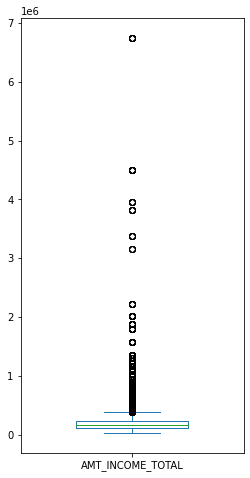

In [12]:
# Visualize the data range in "AMT_INCOME_TOTAL":
app_rec.AMT_INCOME_TOTAL.plot.box(figsize=(4, 8),widths=(0.5), showfliers=True, patch_artist = False)


In [13]:
# we have outliers in AMT_INCOME_TOTAL. We have 2 choice, either remove the outliers or creat buckets for values based on the 8 percentile groups. 
# The second option was selected and finally applied the one hot encoding to the buckets:
app_rec['AMT_INCOME_TOTAL_BUKET'], cut_bin = pd.qcut(app_rec['AMT_INCOME_TOTAL'], q = 8, labels = ['1','2','3','4','5','6','7','8'], retbins = True)
app_rec[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_BUKET']]
app_rec = pd.get_dummies(data=app_rec, columns=['AMT_INCOME_TOTAL_BUKET'])

In [14]:
# Check the OCCUPATION_Type:
print("Number of Missing Values:", app_rec.OCCUPATION_TYPE.isnull().sum())
app_rec.OCCUPATION_TYPE.value_counts()

Number of Missing Values: 134203


Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
# We can assign "Other" for null values. 
app_rec["OCCUPATION_TYPE"].fillna("Other", inplace = True)

In [16]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 43 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  object 
 1   CODE_GENDER                                        438557 non-null  object 
 2   FLAG_OWN_CAR                                       438557 non-null  object 
 3   FLAG_OWN_REALTY                                    438557 non-null  object 
 4   CNT_CHILDREN                                       438557 non-null  int64  
 5   AMT_INCOME_TOTAL                                   438557 non-null  float64
 6   DAYS_BIRTH                                         438557 non-null  int64  
 7   DAYS_EMPLOYED                                      438557 non-null  int64  
 8   FLAG_MOBIL                                         438557 non-null  object

In [17]:
# Create month_employed from DAYS_EMPLOYED.
app_rec["MONTH_EMPLOYED"] = app_rec["DAYS_EMPLOYED"] /30.5

In [18]:
app_rec[["MONTH_EMPLOYED","DAYS_EMPLOYED"] ]

,MONTH_EMPLOYED,DAYS_EMPLOYED
0,-148.918033,-4542
1,-148.918033,-4542
2,-37.180328,-1134
3,-100.032787,-3051
4,-100.032787,-3051
...,...,...
438552,11975.180328,365243
438553,-98.590164,-3007
438554,-12.196721,-372
438555,11975.180328,365243


In [19]:
# Create an employement flag fom DAYS_EMPLOYED.
app_rec['FLAG_EMPLOYED'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0).astype(str)

In [20]:
# Create Age based on DAYS_BIRTH.
app_rec['AGE'] = (app_rec['DAYS_BIRTH']/365).abs().apply(np.floor)

In [21]:
app_rec['AGE']

0         32.0
1         32.0
2         58.0
3         52.0
4         52.0
          ... 
438552    62.0
438553    43.0
438554    22.0
438555    59.0
438556    51.0
Name: AGE, Length: 438557, dtype: float64

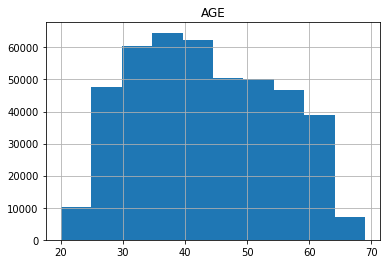

In [22]:

app_rec.hist(column='AGE');

# Create 8 different bucket of Ages
bins = [0, 20, 25,30,45,55,60, 65, 70]
labels = [1,2,3,4,5,6,7,8]
app_rec['AGE_BUKET'] = pd.cut(app_rec['AGE'], bins,labels=labels)
app_rec['AGE_BUKET']

In [23]:
# Create Count of Children bucket based on CNT_CHILDREN
app_rec.CNT_CHILDREN.value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [24]:
app_rec.CNT_CHILDREN_BUCKET = app_rec.CNT_CHILDREN
def conditions(i): 
    if i ==0 : return '0'
    if i ==1 : return "1"
    if i ==2 : return '2'
    if i ==3 : return '3'
    if i ==4 : return '4'
    if i >= 5: return '5'

app_rec['CNT_CHILDREN_BUCKET']=app_rec['CNT_CHILDREN'].apply(conditions)


C:\Users\shaha\AppData\Local\Temp\ipykernel_31572\3365913374.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app_rec.CNT_CHILDREN_BUCKET = app_rec.CNT_CHILDREN


In [25]:
#check Missing Values
app_rec.isnull().sum()

ID                                                   0
CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
OCCUPATION_TYPE                                      0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOM

In [26]:
#Check Dublicate rows
app_rec.duplicated().sum()

0

We do not have any dublicated rows. However, we have dublicated IDs:

In [27]:
app_rec.ID.duplicated().sum()

47

In [28]:
df2 = app_rec[app_rec['ID'].duplicated(keep=False) == True].sort_values(by=['ID']).reset_index(drop=True)
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,AMT_INCOME_TOTAL_BUKET_3,AMT_INCOME_TOTAL_BUKET_4,AMT_INCOME_TOTAL_BUKET_5,AMT_INCOME_TOTAL_BUKET_6,AMT_INCOME_TOTAL_BUKET_7,AMT_INCOME_TOTAL_BUKET_8,MONTH_EMPLOYED,FLAG_EMPLOYED,AGE,CNT_CHILDREN_BUCKET
0,7022197,M,Y,Y,3,135000.0,-11945,-735,1,0,...,1,0,0,0,0,0,-24.098361,0,32.0,3
1,7022197,F,N,Y,0,450000.0,-19813,-1799,1,0,...,0,0,0,0,0,1,-58.983607,0,54.0,0
2,7022327,F,N,Y,0,135000.0,-14771,-5298,1,0,...,1,0,0,0,0,0,-173.704918,0,40.0,0
3,7022327,M,Y,Y,0,256500.0,-21503,-1674,1,0,...,0,0,0,0,1,0,-54.885246,0,58.0,0
4,7023108,M,Y,Y,1,67500.0,-15156,-1696,1,1,...,0,0,0,0,0,0,-55.606557,0,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7836711,F,N,Y,2,292500.0,-13747,-4386,1,0,...,0,0,0,0,0,1,-143.803279,0,37.0,2
90,7836971,M,Y,N,1,157500.0,-13771,-5520,1,0,...,0,1,0,0,0,0,-180.983607,0,37.0,1
91,7836971,F,N,Y,0,103500.0,-13383,-2798,1,0,...,0,0,0,0,0,0,-91.737705,0,36.0,0
92,7838075,M,N,Y,0,337500.0,-18198,-1275,1,0,...,0,0,0,0,0,1,-41.803279,0,49.0,0


Due to the sensitivity of the dublication in ID, as a key, I decided to drop all rows with dublicated IDs.

In [29]:
app_rec = app_rec.drop_duplicates(subset=['ID']).reset_index()

In [30]:
app_rec.shape

(438510, 48)

# B - cre_rec Data Cleaning & Transforming

In [31]:
print("Name of the columns:" ,cre_rec.columns)
print(cre_rec.shape)

Name of the columns: Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
(1048575, 3)


In [32]:
cre_rec.STATUS.unique()
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [48]:
gouped_id = cre_rec.groupby('ID')
pivot_tb = cre_rec.pivot(index="ID", columns='MONTHS_BALANCE', values= 'STATUS')
pivot_tb["Open_Month"] = gouped_id["MONTHS_BALANCE"].min()
pivot_tb['End_Month'] = gouped_id['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[["ID","Open_Month","End_Month"]]
pivot_tb["Observed_Months"] = pivot_tb["End_Month"] - pivot_tb["Open_Month"]
pivot_tb.reset_index(drop = True, inplace = True)

credit = pd.merge(cre_rec, pivot_tb, on = 'ID', how = 'left')

In [59]:
credit = credit[credit['Observed_Months'] > 20]

credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 

credit['status'] = credit['status'].astype(np.int8)

credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['Open_Month'] # calculate month on book: how many months after opening account

credit.sort_values(by = ['ID','month_on_book'], inplace = True)

credit.reset_index(inplace = True)

In [60]:
credit

,index,ID,MONTHS_BALANCE,STATUS,Open_Month,End_Month,Observed_Months,status,month_on_book
0,44,5001713,-21,X,-21,0,21,0,0
1,43,5001713,-20,X,-21,0,21,0,1
2,42,5001713,-19,X,-21,0,21,0,2
3,41,5001713,-18,X,-21,0,21,0,3
4,40,5001713,-17,X,-21,0,21,0,4
...,...,...,...,...,...,...,...,...,...
775277,1048549,5150487,-4,C,-29,0,29,0,25
775278,1048548,5150487,-3,C,-29,0,29,0,26
775279,1048547,5150487,-2,C,-29,0,29,0,27
775280,1048546,5150487,-1,C,-29,0,29,0,28


In [ ]:
cre_rec.sort_values(["ID","MONTHS_BALANCE"],ascending=False,    inplace=False).head(10).set_index('ID')

In [ ]:
#Transpose the credit record 

In [ ]:
cre_rec = pd.DataFrame(cre_rec.groupby(["ID","STATUS"])["STATUS"].count()).rename(columns={'STATUS': 'Freq'}).reset_index()

In [ ]:
cre_rec

In [ ]:
cre_rec.pivot(index="ID", columns='MONTHS_BALANCE', values= 'STATUS')

In [ ]:
cre_rec.loc[cre_rec["ID"]==5001711]

In [ ]:
cre_rec.groupby(by=["ID"])

In [ ]:
cre_rec.ID.duplicated().count()

In [ ]:
cre_rec.shape

In [ ]:
cre_rec.STATUS.value_counts()

# C - Merge the Data Sets

In [ ]:
data = pd.merge(app_rec,cre_rec)

In [ ]:
data

In [ ]:
# Merge 2 datasets based on the id

In [ ]:
#Save the Cleaned Data

# D - Model Development

In [ ]:
# Reload the Cleaned Data

In [ ]:
#Reload the Cleaned Data

In [ ]:
#Load Required librarys
import sklearn 

In [ ]:
#train model 1

In [ ]:
#Test model 1

In [ ]:
#evaluate model 1

In [ ]:
pwd

In [ ]:
# test 2 for my project